In [15]:
!pip install mtcnn
!pip install keras_vggface
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00


In [1]:
import urllib.request

def store_image(url, local_file_name):
  with urllib.request.urlopen(url) as resource:
    with open(local_file_name, 'wb') as f:
      f.write(resource.read())

In [2]:
store_image('https://ichef.bbci.co.uk/news/320/cpsprodpb/5944/production/_107725822_55fd57ad-c509-4335-a7d2-bcc86e32be72.jpg',
            'iacocca_1.jpg')
store_image('https://www.gannett-cdn.com/presto/2019/07/03/PDTN/205798e7-9555-4245-99e1-fd300c50ce85-AP_080910055617.jpg?width=540&height=&fit=bounds&auto=webp',
            'iacocca_2.jpg')

In [5]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

In [6]:
image = plt.imread('iacocca_1.jpg')

In [7]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

1/1 [==============================] - 0s 169ms/step
{'box': [160, 40, 35, 45], 'confidence': 0.9999901652336121, 'keypoints': {'left_eye': (172, 57), 'right_eye': (188, 57), 'nose': (181, 64), 'mouth_left': (173, 73), 'mouth_right': (187, 73)}}


In [8]:
from matplotlib.patches import Rectangle

def highlight_faces(image_path, faces):
  # display image
  image = plt.imread(image_path)
  plt.imshow(image)

  ax = plt.gca()

  # for each face, draw a rectangle based on coordinates
  for face in faces:
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
    ax.add_patch(face_border)
  plt.show()

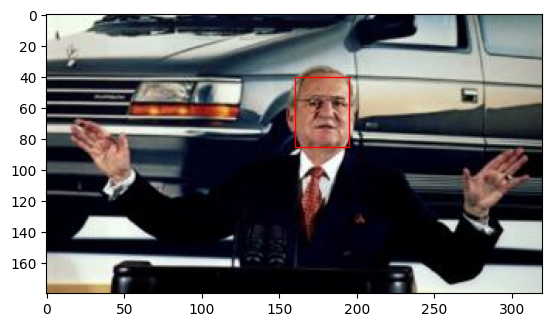

In [9]:
highlight_faces('iacocca_1.jpg', faces)

1/1 [==============================] - 0s 31ms/step


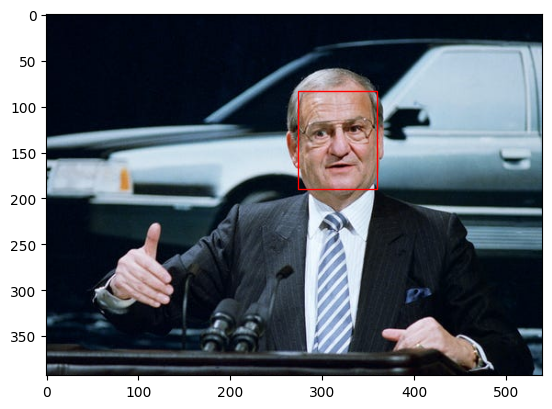

In [17]:
image = plt.imread('iacocca_2.jpg')
faces = detector.detect_faces(image)

highlight_faces('iacocca_2.jpg', faces)